<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp_ML/blob/main/XPW7D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🌟 Exercise 1 : What are Large Language Models (LLMs)?

1. Explain with your words what are LLMs and what they are designed for.

Large Language Models are using for AI and NLP for understanding and generating human-like text. They’re built using deep learning—specifically a type of model called a transformer—and trained on massive amounts of written content, like books, articles, websites, and more.

2. One popular LLMs is GPT (Generative Pretrained Transformer) which is known for powerful text generation capabilities. We will implement it. Copy/Paste this code to a colab notebook:

In [1]:
# Install necessary libraries
!pip install transformers matplotlib --quiet

# Import required libraries
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

3. Now, we want to load a pretrained model and a tokeniner, fill in this partial code :

In [2]:
# 2. Loading a pretrained model and tokenizer
model_name = "gpt2"  # GPT-2 is used here for demonstration; can be replaced with other models
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

print(f"\nModel '{model_name}' loaded successfully!")
print("""
GPT-2 is a causal language model, meaning it predicts the next word in a sequence.
It has been trained on a diverse dataset and can generate coherent, contextually relevant text.
""")


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]


Model 'gpt2' loaded successfully!

GPT-2 is a causal language model, meaning it predicts the next word in a sequence. 
It has been trained on a diverse dataset and can generate coherent, contextually relevant text.



In [3]:
# 3. Create a text generation pipeline
generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

# 4. Generate text
prompt = "Artificial intelligence is transforming the world because"
results = generator(prompt, max_length=50, num_return_sequences=1)

# 5. Display the generated text
print("\nGenerated Text:\n")
print(results[0]['generated_text'])


Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Generated Text:

Artificial intelligence is transforming the world because, according to the New York Times, it "has made the very thing it hopes it will be a part of obsolete."

In other words, even if it looks and sounds better than it did back


🌟 Exercise 2 : Transformer Architecture and Tokenization

Explain with your own words the process of tokenization.

Tokenization is the process of breaking down a piece (single words) of text into smaller units that a machine can understand.

Tokenize the input text

Visualize the tokenisation process.

Original Text: Artificial intelligence is amazing!
Tokens: ['Art', 'ificial', 'Ġintelligence', 'Ġis', 'Ġamazing', '!']
Token IDs: [8001, 9542, 4430, 318, 4998, 0]


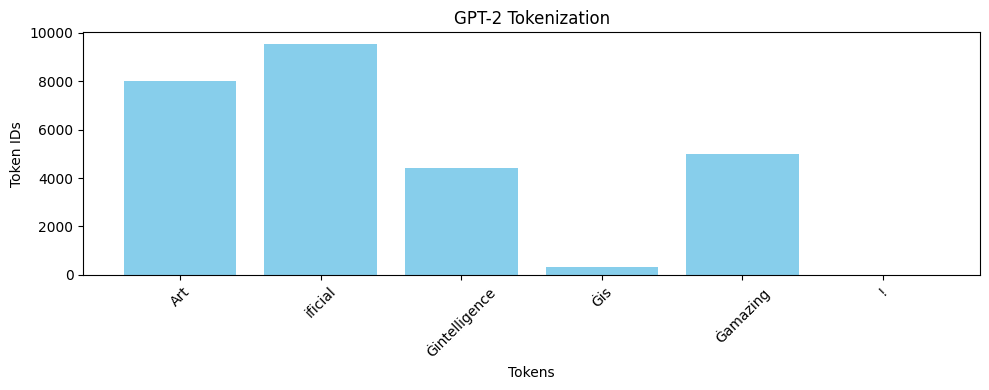

In [4]:
# 1. Define input text
text = "Artificial intelligence is amazing!"

# 2. Tokenize input text
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f"Original Text: {text}")
print(f"Tokens: {tokens}")
print(f"Token IDs: {token_ids}")

# 3. Visualizing the tokenization process
plt.figure(figsize=(10, 4))
plt.bar(tokens, token_ids, color="skyblue")
plt.xlabel("Tokens")
plt.ylabel("Token IDs")
plt.title("GPT-2 Tokenization")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


🌟 Exercise 3 : Understanding Token IDs and Special Prefixes

Print the ID of each tokens from text

What does special prefixes like ‘Ġ’ indicate ?

'Art', 'ificial' → The word "Artificial" is split into two subwords. GPT-2 often splits unfamiliar or long words like this.

'Ġintelligence', 'Ġis', 'Ġamazing' → The 'Ġ' symbol means there's a space before the word. So 'Ġintelligence' = ' intelligence'.

'!' → The punctuation is treated as a separate token.

Token IDs: These are the numbers that map to each token in GPT-2’s vocabulary. For example:

'Art' → 8001

'ificial' → 9542

'!' → 0


🌟 Exercise 4 : Pretraining vs. Fine-Tuning

Explain with your own words the two phases of Pretraining and FineTuning in Transformers.

**Pretraining**

This is the first phase, where a transformer model (like GPT or BERT) is trained on a huge amount of general text from books, websites, Wikipedia, etc.

The model learns how language works: grammar, sentence structure, common facts, and patterns in text.

**Fine-Tuning**

Once pretrained, the model can be fine-tuned on a specific task with a smaller, focused dataset — like sentiment analysis, question answering, or medical diagnosis.


🌟 Exercise 5 : Generate Simple Text
Create a variable text with the sentence of your choice (another one)
The model generates text by predicting the next word sequentially, based on the given input text (prompt). Generate output using the model.

In [5]:
# 1. Choose your input prompt
input_text = "The future of technology lies in"

# 2. Tokenize the input
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# 3. Generate output using the model
output_ids = model.generate(input_ids, max_length=30, num_return_sequences=1, no_repeat_ngram_size=2, do_sample=True)

# 4. Decode the output tokens to readable text
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

# 5. Print the result
print(f"Input: {input_text}")
print(f"Generated Output: {output_text}")


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Input: The future of technology lies in
Generated Output: The future of technology lies in a world where every person takes his turn, with little interference by outsiders. The best tech is found in the most well
